In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Embedding, BatchNormalization, Flatten, SimpleRNN, LSTM, GRU, concatenate
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential, Model
from keras import Input
from tensorflow.keras.utils import plot_model

from keras.datasets import reuters

In [2]:
(X_train,y_train),(X_test,y_test) = reuters.load_data()

In [3]:
from keras.layers import Embedding

# Embedding 층은 적어도 두 개의 매개변수를 받습니다.
# 가능한 토큰의 개수(여기서는 1,000으로 단어 인덱스 최댓값 + 1입니다)와 임베딩 차원(여기서는 64)입니다

# pd.Series(X_train).apply(len).max()
length = pd.Series(X_train).apply(len).max()+1

embedding_layer = Embedding(length, 64)

In [4]:
dir(embedding_layer)
embedding_layer.weights
X_train.shape

(8982,)

In [5]:
#시리즈로 바꾸기
pd.Series(X_train).apply(len).max()

2376

In [6]:
if pd.Series(X_test).apply(len).max() > pd.Series(X_test).apply(len).max():
    maxlen = pd.Series(X_test).apply(len).max()+1
else:
    maxlen = pd.Series(X_train).apply(len).max()+1

In [7]:
X_train = pad_sequences(X_train,maxlen=maxlen,padding='post')
X_test = pad_sequences(X_test,maxlen=maxlen,padding='post')

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
ouput_shape = y_train.shape[1]

In [10]:
max(X_train[0])

28842

In [11]:
max_val = 0
for i in X_train:
    if max(i) > max_val:
        max_val = max(i)   

In [12]:
max_val += 1
max_val

30982

In [13]:
word_idx = reuters.get_word_index()

In [14]:
#1
model = Sequential()
model.add(Embedding(max_val, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(12))
model.add(BatchNormalization())
model.add(Dense(ouput_shape,activation="softmax"))

optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=metrics)

epochs = 5
batch_size = 32
model.fit(X_train, 
          y_train,
         epochs=epochs,
         batch_size=batch_size)

model.evaluate(X_test,y_test)

Epoch 1/5
281/281 [==============================] - 2s 6ms/step - loss: 2.3501 - accuracy: 0.5341
Epoch 2/5
281/281 [==============================] - 2s 6ms/step - loss: 1.2788 - accuracy: 0.7189
Epoch 3/5
281/281 [==============================] - 2s 6ms/step - loss: 0.8641 - accuracy: 0.8157
Epoch 4/5
281/281 [==============================] - 2s 6ms/step - loss: 0.6469 - accuracy: 0.8735
Epoch 5/5
71/71 [==============================] - 0s 2ms/step - loss: 1.5764 - accuracy: 0.6723


[1.5763756036758423, 0.6723062992095947]

In [15]:
#2 #오래걸리니 실행은 함부로 말것
# model = Sequential()
# model.add(Embedding(max_val, 8, input_length=maxlen))
# model.add(SimpleRNN(maxlen,return_sequences=True))
# model.add(SimpleRNN(maxlen,return_sequences=True))
# model.add(SimpleRNN(maxlen,return_sequences=True))
# model.add(SimpleRNN(maxlen))
# model.add(Dense(ouput_shape,activation="softmax"))

# optimizer = 'adam'
# loss = 'categorical_crossentropy'
# metrics = ['accuracy']
# model.compile(optimizer=optimizer,
#              loss=loss,
#              metrics=metrics)

# epochs = 6
# batch_size = 32
# model.fit(X_train, 
#           y_train,
#          epochs=epochs,
#          batch_size=batch_size)

# model.evaluate(X_test,y_test)

In [16]:
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=10000) 

In [17]:
X_train = pad_sequences(X_train,100)
X_test = pad_sequences(X_test,100)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
input_shape= X_train.shape[1]
output_shape = y_train.shape[1]

In [19]:
model = Sequential()
model.add(Embedding(10001,128,input_length=input_shape))
model.add(Conv1D(32,7,activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(output_shape,activation='softmax'))

In [20]:
input_data = Input(shape=(input_shape,))
embedding = Embedding(10001,128)(input_data)
conv_layer = Conv1D(32,7,activation='relu')(embedding)
pooling_layer = MaxPooling1D()(conv_layer)
flatten = Flatten()(pooling_layer)
fc_layer = Dense(128,activation='relu')(flatten)
output = Dense(output_shape,activation='softmax')(fc_layer)
model = Model(inputs=[input_data],outputs=output)

In [21]:
opt = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt, loss = loss, metrics = metrics)

In [22]:
epochs= 10
batch_size = 32
model.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size)

Epoch 1/10
281/281 [==============================] - 5s 18ms/step - loss: 1.7368 - accuracy: 0.5499
Epoch 2/10
281/281 [==============================] - 5s 18ms/step - loss: 1.1993 - accuracy: 0.7016
Epoch 3/10
281/281 [==============================] - 5s 18ms/step - loss: 0.8904 - accuracy: 0.7783
Epoch 4/10
281/281 [==============================] - 5s 19ms/step - loss: 0.6294 - accuracy: 0.8416
Epoch 5/10
281/281 [==============================] - 5s 18ms/step - loss: 0.4216 - accuracy: 0.8978
Epoch 6/10
281/281 [==============================] - 5s 18ms/step - loss: 0.3018 - accuracy: 0.9318
Epoch 7/10
281/281 [==============================] - 6s 22ms/step - loss: 0.2390 - accuracy: 0.9466
Epoch 8/10
281/281 [==============================] - 6s 21ms/step - loss: 0.2015 - accuracy: 0.9502
Epoch 9/10
281/281 [==============================] - 7s 23ms/step - loss: 0.1849 - accuracy: 0.9516
Epoch 10/10
281/281 [==============================] - 7s 23ms/step - loss: 0.1674 - accura

In [23]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.4986 - accuracy: 0.7128


[1.4985965490341187, 0.7128227949142456]

In [24]:
from keras.datasets import reuters
(X_train,y_train),(X_test,y_test) = reuters.load_data()

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 100, 128)          1280128   
                                                                 
 conv1d_1 (Conv1D)           (None, 94, 32)            28704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 47, 32)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1504)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               192640    
                                                             

In [26]:
model = Sequential()
model.add(Embedding(1000,64,input_length=100))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

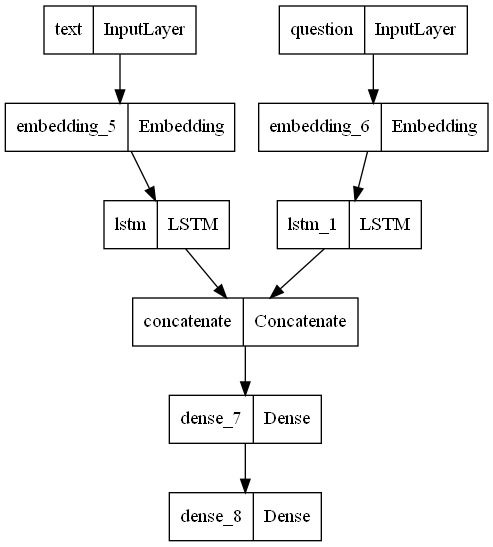

In [28]:
text_vocab_size = 10000
question_vocab_size = 10000
answer_vocab_size = 500

text_input = Input(shape=(None,),name="text")
question_input = Input(shape=(None,),name="question")
embedded_text = Embedding(text_vocab_size,64)(text_input)
embedded_question = Embedding(question_vocab_size,32)(question_input)
encoded_text = LSTM(32)(embedded_text)
encoded_question = LSTM(32)(embedded_question)

concated = concatenate([encoded_text,encoded_question],axis=-1)

answer = Dense(500,activation='relu')(concated)
output = Dense(answer_vocab_size,activation="softmax")(answer)


model = Model(inputs=[text_input,question_input],outputs=output)

plot_model(model)

In [29]:
encoded_question.shape

TensorShape([None, 32])

In [38]:
ref_text = Input(shape=(None,),name='ref')
question_text = Input(shape=(None,),name='question')
ref_embedding = Embedding(1000,64)(ref_text)
qeustion_embedding = Embedding(1000,64)(question_text)

In [36]:
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_shape=(100,)))
model.add(Dense(100,activation='softmax'))

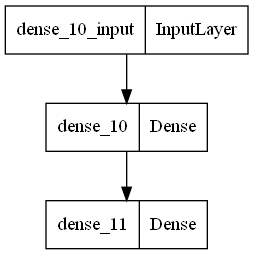

In [37]:
plot_model(model)

# 다른 데이터로 해보기

In [41]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) =  boston_housing.load_data()

from keras.layers import Dense
from keras.models import Model
from keras import Input

input_data1 = Input(shape=(X_train.shape[1],))
layer1 = Dense(64,activation='relu')(input_data)
layer2 = Dense(64,activation='relu')(layer1)
output = Dense(1)(layer2)
model = Model(inputs=[input_data],outputs=output)

optimizer='rmsprop'
loss = 'mse'
metrics = ['mae']
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=metrics)

epochs= 500
batch_size = 100
model.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size)

Epoch 1/500


ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_4" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 13)


In [42]:
# np.sum(np.square(y_test - model.predict(X_test)))
sst = np.sum(np.square(y_test - np.mean(y_test)))
sse = np.sum(np.square(y_test - model.predict(X_test)))
sse/sst

ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_4" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 13)
